# Introduction to Machine Learning and Toolkit Exercises 

## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `Iris_Data.csv` found in the [data](../../data) directory.

In [1]:
from __future__ import print_function
import os
data_path = ['..', '..', 'data']

## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [2]:
import pandas as pd

data = pd.read_csv("Iris_Data.csv")
df = pd.DataFrame(data)

df.shape

(150, 5)

## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [3]:
data['species'] = data.species.str.replace('Iris-', '')

data
df = pd.DataFrame(data)

## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [4]:
stats_df = data.describe()
stats_df.loc["range"] = stats_df.loc["max"] - stats_df.loc["min"]

title = ['mean','25%','50%','75%', 'range', "mean"]
stats_df = stats_df.loc[title]
stats_df.rename({"50%" : "median"}, inplace = True)
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000
mean,5.843333,3.054,3.758667,1.198667


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [5]:
import numpy as np

gk = df.groupby("species")

gk.agg([np.median, np.mean])

sepal_length        sepal_width        petal_length         \
                 median   mean      median   mean       median   mean   
species                                                                 
setosa              5.0  5.006         3.4  3.418         1.50  1.464   
versicolor          5.9  5.936         2.8  2.770         4.35  4.260   
virginica           6.5  6.588         3.0  2.974         5.55  5.552   

           petal_width         
                median   mean  
species                        
setosa             0.2  0.244  
versicolor         1.3  1.326  
virginica          2.0  2.026

## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

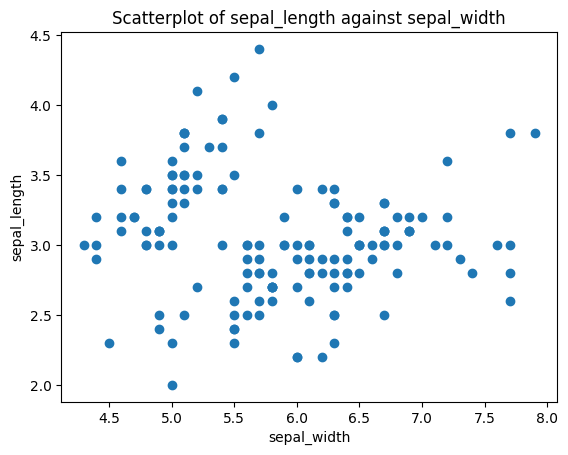

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)
ax.set(xlabel = "sepal_width", ylabel = "sepal_length", title = "Scatterplot of sepal_length against sepal_width")
plt.show()

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

[Text(0.5, 0, 'Petal Length'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Histogram of Petal Length')]

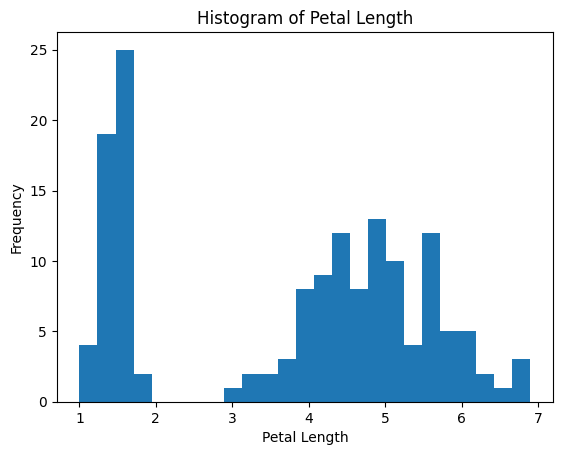

In [7]:
ax = plt.axes()

ax.hist(data.petal_length, bins = 25)
ax.set(xlabel = "Petal Length", ylabel = "Frequency", title = "Histogram of Petal Length")

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

[Text(0.5, 0, 'Size (cm)')]

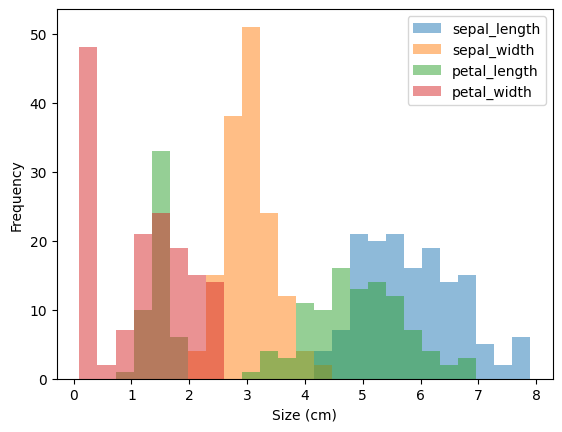

In [8]:
ax = data.plot.hist(bins = 25, alpha = 0.5)
ax.set(xlabel = "Size (cm)")

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

<Figure size 640x480 with 0 Axes>

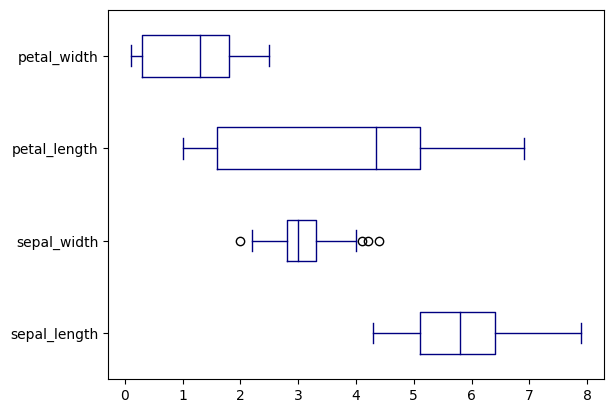

In [9]:
plt.figure()
bx = df.plot.box(color="navy", vert = False)


## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

<AxesSubplot: xlabel='measurement', ylabel='size'>

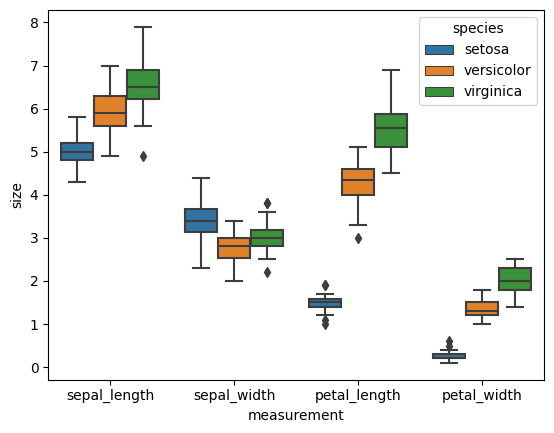

In [10]:
import seaborn as sns

plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data)

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

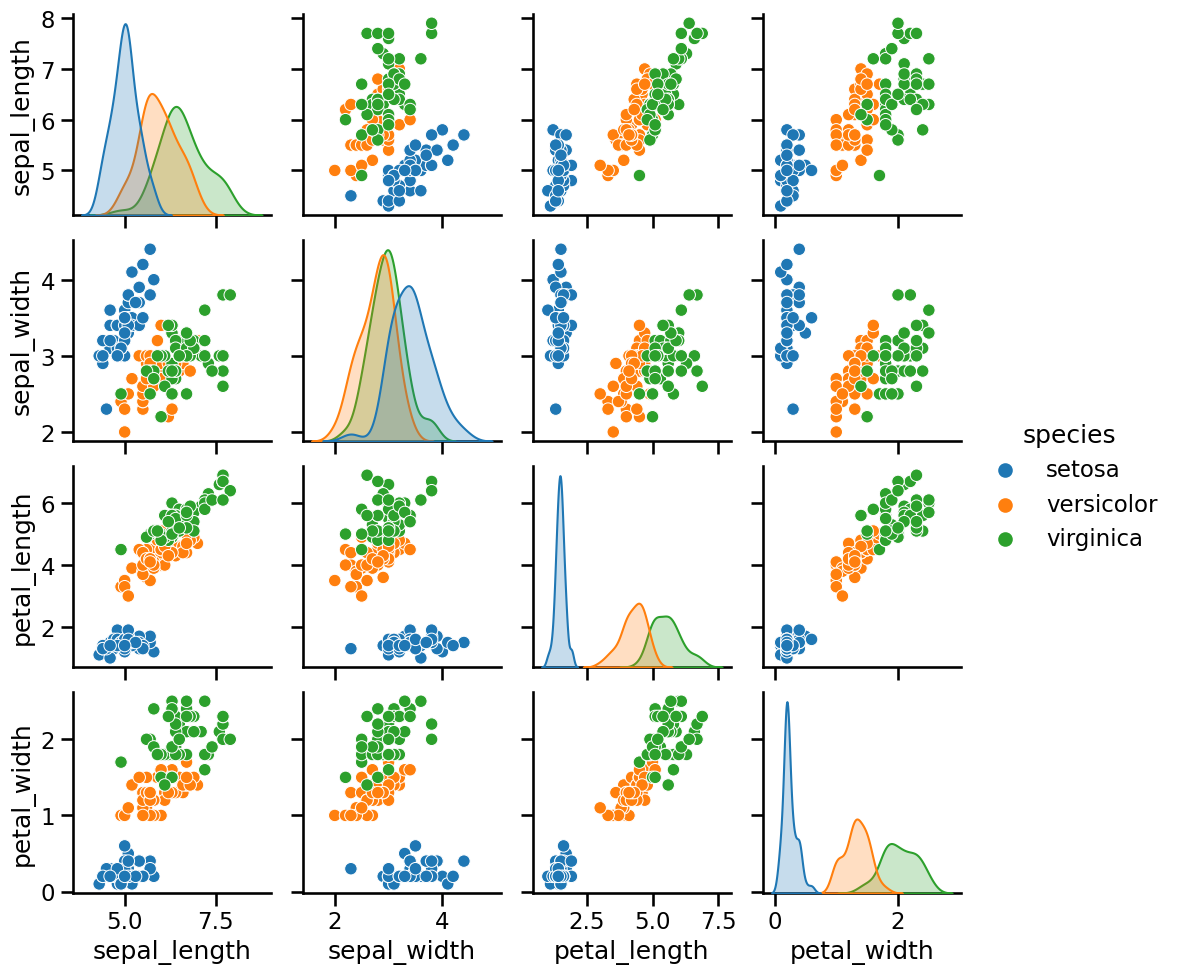

In [11]:
sns.set_context('talk')
sns.pairplot(data, hue='species')

<AxesSubplot: xlabel='species'>

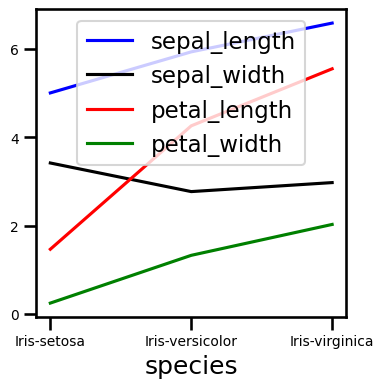

In [12]:
import pandas as pd

data = pd.read_csv("Iris_Data.csv")

(data.groupby("species")
    .mean()
    .plot(color=["blue","black","red","green"],fontsize = 10, figsize = (4,4)))

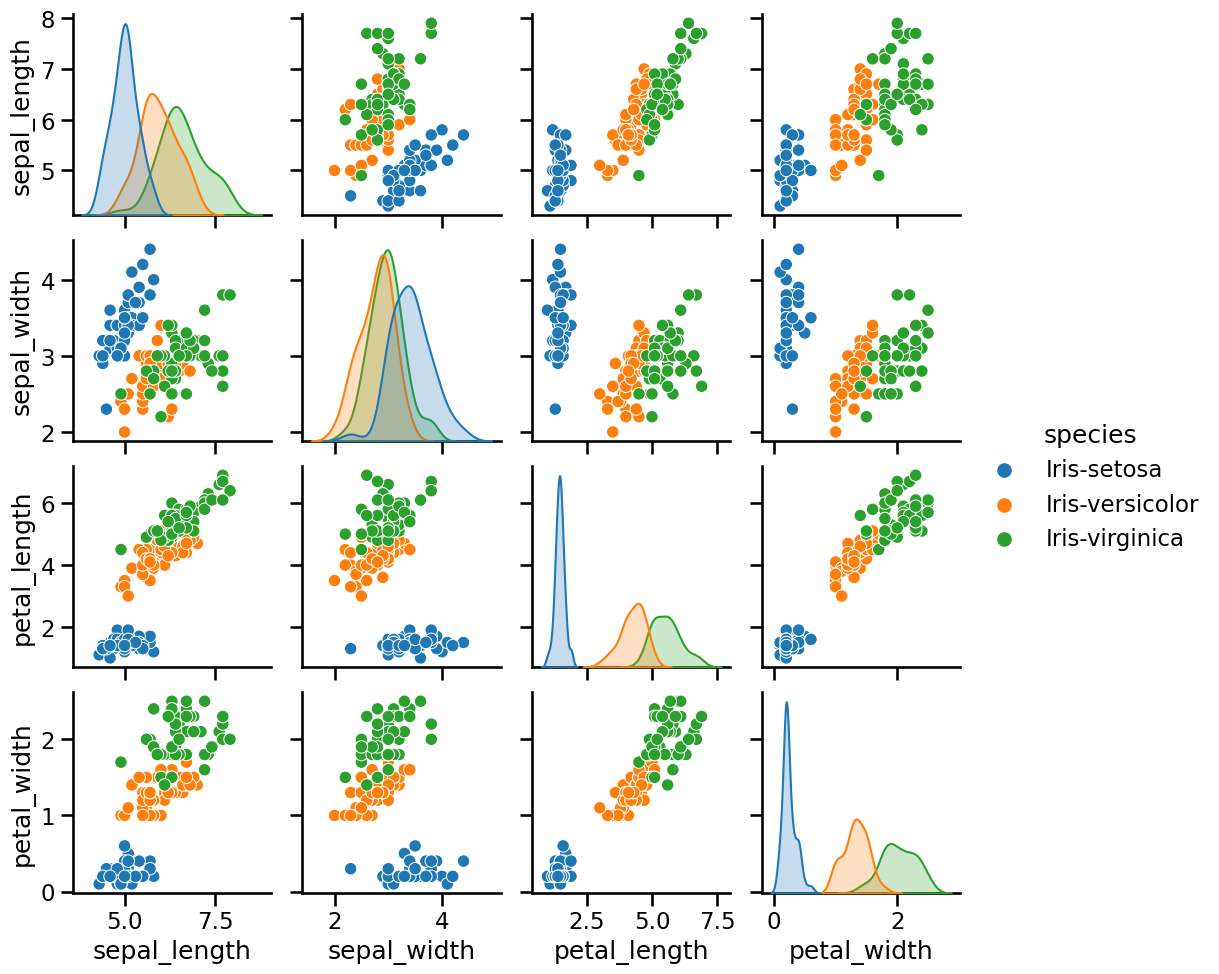

In [13]:
import seaborn as sns

sns.pairplot(data, hue='species')

In [32]:
data = df.values

X = data[:,0:4]
Y = data[:,4]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)


In [33]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(X_train, Y_train)

SVC()

In [36]:
from sklearn.metrics import accuracy_score

prediction1 = model_svc.predict(X_test)
print(accuracy_score(Y_test, prediction1)* 100)
for i in range(len(prediction1)):
    print(Y_test[i], prediction1[i])

95.0
virginica virginica
setosa setosa
setosa setosa
setosa setosa
setosa setosa
versicolor versicolor
versicolor versicolor
versicolor versicolor
setosa setosa
versicolor versicolor
setosa setosa
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
virginica virginica
setosa setosa
versicolor versicolor
versicolor versicolor
virginica virginica
virginica virginica
setosa setosa
versicolor versicolor
virginica virginica
versicolor versicolor
setosa setosa
setosa setosa
virginica virginica
virginica versicolor
setosa setosa
virginica virginica
versicolor versicolor
virginica virginica
virginica virginica
setosa setosa
virginica virginica
virginica virginica
virginica virginica
versicolor virginica
virginica virginica
versicolor versicolor
virginica virginica
versicolor versicolor
versicolor versicolor
virginica virginica
virginica virginica
versicolor versicolor
setosa setosa
versicolor versicolor
virginica virginica
setosa setosa
setosa setosa
virgini

In [38]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(X_train, Y_train)

LogisticRegression()

In [18]:
prediction2 = model_LR.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, prediction2)* 100)
for i in range(len(prediction2)):
    print(Y_test[i], prediction2[i])

98.33333333333333
versicolor versicolor
virginica virginica
setosa setosa
versicolor versicolor
versicolor versicolor
setosa setosa
setosa setosa
versicolor versicolor
setosa setosa
setosa setosa
setosa setosa
virginica virginica
versicolor versicolor
virginica virginica
versicolor versicolor
setosa setosa
versicolor versicolor
versicolor versicolor
virginica virginica
virginica virginica
virginica virginica
setosa setosa
setosa setosa
setosa setosa
versicolor versicolor
virginica virginica
virginica virginica
versicolor versicolor
virginica virginica
virginica virginica
setosa setosa
virginica virginica
setosa setosa
setosa setosa
setosa setosa
virginica virginica
virginica virginica
setosa setosa
versicolor versicolor
setosa setosa
versicolor versicolor
versicolor versicolor
versicolor versicolor
virginica virginica
versicolor versicolor
setosa setosa
virginica versicolor
virginica virginica
versicolor versicolor
setosa setosa
virginica virginica
versicolor versicolor
versicolor vers

In [20]:
prediction3 = model_DTC.predict(X_test)
from sklearn.tree import DecisionTreeClassifier
model_DTC=DecisionTreeClassifier()
model_DTC.fit(X_train, Y_train)
for i in range(len(prediction3)):
    print(Y_test[i], prediction3[i])

versicolor versicolor
virginica virginica
setosa setosa
versicolor versicolor
versicolor versicolor
setosa setosa
setosa setosa
versicolor versicolor
setosa setosa
setosa setosa
setosa setosa
virginica virginica
versicolor versicolor
virginica virginica
versicolor versicolor
setosa setosa
versicolor versicolor
versicolor versicolor
virginica virginica
virginica virginica
virginica virginica
setosa setosa
setosa setosa
setosa setosa
versicolor versicolor
virginica virginica
virginica virginica
versicolor versicolor
virginica virginica
virginica virginica
setosa setosa
virginica virginica
setosa setosa
setosa setosa
setosa setosa
virginica virginica
virginica virginica
setosa setosa
versicolor versicolor
setosa setosa
versicolor versicolor
versicolor versicolor
versicolor versicolor
virginica virginica
versicolor versicolor
setosa setosa
virginica versicolor
virginica virginica
versicolor versicolor
setosa setosa
virginica virginica
versicolor versicolor
versicolor versicolor
setosa seto

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, prediction3)* 100)

98.33333333333333


In [31]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, prediction1))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       0.95      1.00      0.97        19
   virginica       1.00      0.95      0.97        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [28]:
X_new = np.array([[3,2,1,0.2],[4.9,2.2,3.8,1.1],[5.3,2.5,4.6,1.9]])

prediction = model_svc.predict(X_new)
print("Prediction of Species: ", prediction)

Prediction of Species:  ['setosa' 'versicolor' 'versicolor']
